## Freeze 10 Cleanup - GECOPD

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
if 'snakemake' in locals():
    print('Snakemake')
    print(f'{snakemake.input}')
else:
    print('local')
    
#with open('tmp/flags_remra.txt', 'w') as fh:
#   fh.write('')

local


In [7]:
s_studyid = 'GECOPD'
#path = '/proj/regeps/regep00/studies/TopMed/data/dna/whole_genome/TopMed/data/freezes/freeze.10.cdnm/tmp/'
path = '/proj/regeps/regep00/studies/TopMed/data/dna/whole_genome/TopMed/data/freezes/freeze.10.cdnm/tmp/sav/'

##files:
pop_file = path+s_studyid+'_annotated_plink_merged.fam'
chrom_file = path+s_studyid+'_annotated_plink_merged.bim'
kin_file = path+s_studyid+'_annotated_plink_merged.kin'
sexcheck_file= path+s_studyid+'_annotated_plink_merged.sexcheck'
hwe_file = path+s_studyid+'_annotated_plink_merged.hwe'
frq_file = path+s_studyid+'_annotated_plink_merged.frq'
het_file = path+s_studyid+'_annotated_plink_merged.het'
imiss_file = path+s_studyid+'_annotated_plink_merged.imiss'
lmiss_file = path+s_studyid+'_annotated_plink_merged.lmiss'
kin0_file = '/proj/regeps/regep00/studies/TopMed/data/dna/whole_genome/TopMed/data/freezes/freeze.10.cdnm/tmp/GECOPD_king.kin0'

### F coefficent estimates

In [8]:
#table var :
#table of F > |0.2| , distribution of F with 0.2/-0.2 marked
het_tbl = pd.read_csv(het_file, delim_whitespace=True)

def tbl_filtered_fcoe(f_bound):
    print('Samples out of range: '+ str(het_tbl.size - het_tbl.query('F >= -0.2').query('F <= 0.2').size))
    return het_tbl.query('F >= -'+str(f_bound)).query('F <= '+str(f_bound))

tbl_filtered_fcoe(0.2)


Samples out of range: 24


,FID,IID,O(HOM),E(HOM),N(NM),F
0,0,NWD100018,50519820,50190000.0,52481961,0.1444
1,0,NWD100059,50643054,50320000.0,52619882,0.1402
2,0,NWD100095,49982833,50320000.0,52618906,-0.1466
3,0,NWD100109,50624166,50320000.0,52619862,0.1320
4,0,NWD100230,50624825,50320000.0,52619436,0.1324
...,...,...,...,...,...,...
10583,0,NWD999840,50652831,50320000.0,52619604,0.1446
10584,0,NWD999849,50639076,50320000.0,52619431,0.1386
10585,0,NWD999930,50638536,50320000.0,52619458,0.1384
10586,0,NWD999969,50650374,50320000.0,52618319,0.1440


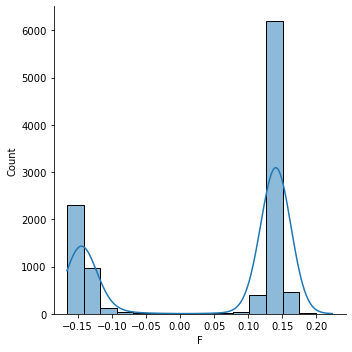

In [5]:
#plots:
sns.displot(het_tbl['F'], kde=True)
#plt.hist(het_tbl['F'])

### Sample based missing data 

In [9]:
#table var :
imiss_tbl = pd.read_csv(imiss_file, delim_whitespace=True)

In [12]:
# how many individuals removed from data based on threshold 
def filter_missingdata(threshold, tbl):
    total = tbl.size
    filtered = tbl.query('F_MISS >'+str(threshold)).size
    ppl_removed = 'The people filtered out: '+str(filtered)
    return filtered

sizes = []
sizes.append(filter_missingdata((0), imiss_tbl))
percents = ['total',10,11,12,13,14,15,16,17,18,19,20]
for per in range(10,21):
    size = filter_missingdata((per/100), imiss_tbl)
    sizes.append(size)

d = {'F_MISS >': percents, 'Num of samples': sizes}
print(pd.DataFrame(data=d))

   F_MISS >  Num of samples
0     total           63528
1        10             144
2        11             126
3        12             114
4        13             102
5        14              96
6        15              96
7        16              84
8        17              60
9        18              54
10       19              42
11       20              42


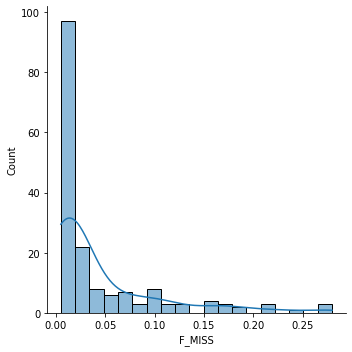

In [40]:
#plots:
sns.displot(imiss_tbl.query('F_MISS > 0.005')['F_MISS'], kde=True)

### Variant based missing data

In [13]:
#table var :
lmiss_tbl = pd.read_csv(lmiss_file, delim_whitespace=True)
print(lmiss_tbl)

          CHR           SNP  N_MISS  N_GENO    F_MISS
0           1      1:128667      14   10588  0.001322
1           1      1:138300      15   10588  0.001417
2           1      1:138532       6   10588  0.000567
3           1      1:139309       5   10588  0.000472
4           1      1:139365       4   10588  0.000378
...       ...           ...     ...     ...       ...
55104303   23  23:156025243      11   10588  0.001039
55104304   23  23:156025294      18   10588  0.001700
55104305   23  23:156025353      24   10588  0.002267
55104306   23  23:156025475      49   10588  0.004628
55104307   23  23:156025650     201   10588  0.018980

[55104308 rows x 5 columns]


In [14]:
# how many individuals removed from data based on threshold 
sizes = []
sizes.append(filter_missingdata((0), imiss_tbl))
percents = ['total',1,2,3,4,5]
for per in range(1,6):
    size = filter_missingdata((per/100), imiss_tbl)
    sizes.append(size)

d = {'F_MISS %': percents, 'Num of samples removed': sizes}
print(pd.DataFrame(data=d))

  F_MISS %  Num of samples removed
0    total                   63528
1        1                     708
2        2                     438
3        3                     330
4        4                     306
5        5                     258


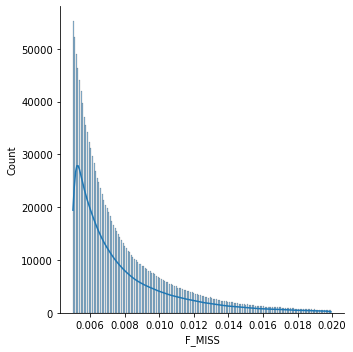

In [47]:
#plots:
#plt.hist(lmiss_tbl['F_MISS'])
sns.displot(lmiss_tbl.query('F_MISS > 0.005')['F_MISS'], kde=True)

IBS0 vs Kinship , Table of Kinship >= 0.354 

In [15]:
#table var :
kin0_tbl = pd.read_csv(kin0_file, delim_whitespace=True)

def filter_kinship(kin_coef):
    return kin0_tbl[kin0_tbl['Kinship'] >= kin_coef]

/udd/remra/.conda/envs/cdnm-jupyter-python-3.7.6/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


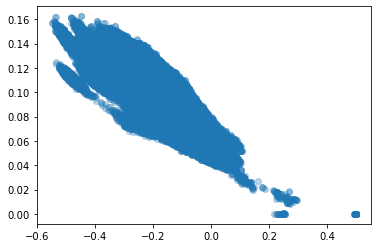

In [49]:
#plots:
plt.scatter(kin0_tbl['Kinship'], kin0_tbl['IBS0'], alpha=0.3)